In [193]:
import geopandas as gpd
import pandas as pd
import numpy as np
import fiona
import folium
import glob

# Process EPCs with tenure and break down floor area by tenure

In [204]:
uprn = pd.read_csv('./../../../../../../Desktop/MAV/osopenuprn_202302.csv')
uprn['UPRN'] = uprn['UPRN'].astype('float64')

list_paths = glob.glob('./../../../../../../Desktop/MAV/all-domestic-certificates/*')
    
for i in range(len(list_paths)):
        path = list_paths[i] + '/certificates.csv'
        name = list_paths[i][-20:]
        epc = pd.read_csv(path, usecols=['TOTAL_FLOOR_AREA','TENURE','UPRN','LODGEMENT_DATE']) # columns = ['TOTAL_FLOOR_AREA','UPRN','LODGEMENT_DATE']
        # clean the uprn and add
        epc['UPRN'] = epc['UPRN'].astype('float64')
        epc2 = epc.merge(uprn, on = 'UPRN',how = 'left')
        # clean duplicates
        epc2['LODGEMENT_DATE'] = pd.to_datetime(epc2['LODGEMENT_DATE'], format='%Y-%m-%d')
        epc2 = epc2.sort_values(by="LODGEMENT_DATE").drop_duplicates(subset=["UPRN"], keep="last")
        epc2 = epc2.loc[epc2.groupby('UPRN').LODGEMENT_DATE.idxmax()]
        # save to new folder
        epc2.to_csv(str('./../../../../../../Desktop/MAV/all_certificates/' +  name + '.csv')) # path_save_cleaned = './../Data/Energy_Performance_Certificate/cerificates_processed/'

In [201]:
OA21 = gpd.read_file('./../Data/boundaries/Output_Areas/Output_Areas_Dec_2021_Boundaries_Generalised_Clipped_EW_BGC_2022_-5131276949491721609.geojson').to_crs('EPSG:4326')
#LA = gpd.read_file('../Data/boundaries/Output_Areas/LAD_Dec_2021_GB_BFC_2022_-8975151699474964544.geojson').to_crs('EPSG:4326')

In [207]:
list_paths2 = glob.glob("./../../../../../../Desktop/MAV/all_certificates/*.csv")

data = pd.DataFrame()

for i in range(len(glob.glob('./../../../../../../Desktop/MAV/all_certificates/*.csv'))):
    x = pd.read_csv(list_paths2[i],usecols = ['UPRN','TENURE','TOTAL_FLOOR_AREA','LATITUDE','LONGITUDE'])
    data = pd.concat([data,x])

In [209]:
data.TENURE[data.TENURE.isin(['NO DATA!', 'unknown','Not defined - use in the case of a new dwelling for which the intended tenure in not known. It is no'])] = 'Unknown'

/var/folders/t5/57qdsp617xj8dd1by4td7fl40000gq/T/ipykernel_10091/2886463896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TENURE[data.TENURE.isin(['NO DATA!', 'unknown','Not defined - use in the case of a new dwelling for which the intended tenure in not known. It is no'])] = 'Unknown'


In [210]:
data.TENURE[data.TENURE.isin(['owner-occupied'])] = 'Owner-occupied'
data.TENURE[data.TENURE.isin(['rental (social)'])] = 'Rented (social)'
data.TENURE[data.TENURE.isin(['rental (private)'])] = 'Rented (private)'
data.TENURE[data.TENURE.isna()] = 'Unknown'

/var/folders/t5/57qdsp617xj8dd1by4td7fl40000gq/T/ipykernel_10091/2549582263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TENURE[data.TENURE.isin(['owner-occupied'])] = 'Owner-occupied'
/var/folders/t5/57qdsp617xj8dd1by4td7fl40000gq/T/ipykernel_10091/2549582263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TENURE[data.TENURE.isin(['rental (social)'])] = 'Rented (social)'
/var/folders/t5/57qdsp617xj8dd1by4td7fl40000gq/T/ipykernel_10091/2549582263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [211]:
data = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data.LONGITUDE,data.LATITUDE),crs='EPSG:4326')

In [212]:
epc2 = data.sjoin(OA21.loc[:,['OA21CD','geometry']], how = 'left')

In [213]:
epc2.loc[epc2.TENURE.isin(['Rented (social)'])]

TOTAL_FLOOR_AREA           TENURE          UPRN   LATITUDE  LONGITUDE  \
0                  98.0  Rented (social)  1.003389e+09  51.773500   0.086314   
1                  99.0  Rented (social)  1.003389e+09  51.773469   0.086231   
2                  99.0  Rented (social)  1.003389e+09  51.773433   0.086159   
3                  99.0  Rented (social)  1.003389e+09  51.773396   0.086079   
4                  98.0  Rented (social)  1.003389e+09  51.773363   0.086005   
...                 ...              ...           ...        ...        ...   
42356              94.0  Rented (social)  2.000029e+11  53.112707  -3.041223   
42374              68.0  Rented (social)  2.000029e+11  53.336570  -3.359523   
42375              68.0  Rented (social)  2.000029e+11  53.336578  -3.359614   
42376              68.0  Rented (social)  2.000029e+11  53.336576  -3.359737   
42377              68.0  Rented (social)  2.000029e+11  53.336584  -3.359827   

                        geometry  index_right     OA21CD  
0       POINT (0.08631 51.77350)     105069.0  E00110951  
1       POINT (0.08623 51.77347)     105069.0  E00110951  
2       POINT (0.08616 51.77343)     105069.0  E00110951  
3       POINT (0.08608 51.77340)     105069.0  E00110951  
4       POINT (0.08601 51.77336)     105069.0  E00110951  
...                          ...          ...        ...  
42356  POINT (-3.04122 53.11271)     180022.0  W00001445  
42374  POINT (-3.35952 53.33657)     180169.0  W00001596  
42375  POINT (-3.35961 53.33658)     180169.0  W00001596  
42376  POINT (-3.35974 53.33658)     180170.0  W00001597  
42377  POINT (-3.35983 53.33658)     180170.0  W00001597  

[2989429 rows x 8 columns]

In [214]:
epc_ren_soc = epc2.loc[epc2.TENURE.isin(['Rented (social)'])]
epc_ren_pri = epc2.loc[epc2.TENURE.isin(['Rented (private)'])]
epc_owned = epc2.loc[epc2.TENURE.isin(['Owner-occupied'])]

In [215]:
epc_owned

TOTAL_FLOOR_AREA          TENURE          UPRN   LATITUDE  LONGITUDE  \
7                 90.00  Owner-occupied  1.003389e+09  51.773210   0.085655   
15                56.00  Owner-occupied  1.003389e+09  51.773120   0.085325   
17               145.00  Owner-occupied  1.003389e+09  51.784454   0.149049   
18                73.00  Owner-occupied  1.003389e+09  51.766921   0.083474   
21                51.00  Owner-occupied  1.003389e+09  51.747858   0.099234   
...                 ...             ...           ...        ...        ...   
42385             97.00  Owner-occupied  2.000043e+11  53.155096  -3.189302   
42386             95.00  Owner-occupied  2.000043e+11  53.154674  -3.189039   
42387            114.44  Owner-occupied  2.000043e+11  53.154933  -3.188100   
42388             78.00  Owner-occupied  2.000043e+11  53.155093  -3.189532   
42389            172.00  Owner-occupied  2.000043e+11  53.155112  -3.191305   

                        geometry  index_right     OA21CD  
7       POINT (0.08566 51.77321)     105069.0  E00110951  
15      POINT (0.08533 51.77312)     105063.0  E00110945  
17      POINT (0.14905 51.78445)     170522.0  E00182509  
18      POINT (0.08347 51.76692)     105078.0  E00110960  
21      POINT (0.09923 51.74786)     105163.0  E00111052  
...                          ...          ...        ...  
42385  POINT (-3.18930 53.15510)     179667.0  W00001085  
42386  POINT (-3.18904 53.15467)     179667.0  W00001085  
42387  POINT (-3.18810 53.15493)     179667.0  W00001085  
42388  POINT (-3.18953 53.15509)     179667.0  W00001085  
42389  POINT (-3.19130 53.15511)     179667.0  W00001085  

[9244075 rows x 8 columns]

In [125]:
pd.DataFrame(columns=['OA21CD'],data = epc2['OA21CD'].unique())

OA21CD
0       E00148810
1       E00148785
2       E00148781
3       E00148779
4       E00148516
...           ...
181999  E00171563
182000  E00171564
182001  E00171567
182002  E00171568
182003  E00190191

[182004 rows x 1 columns]

In [216]:
# How many properties there is in each tenure
#count_rent_soc= epc_ren_soc.loc[:,['OA21CD','TOTAL_FLOOR_AREA']].groupby('OA21CD').count().rename(columns={'TOTAL_FLOOR_AREA':'COUNT_REN_SOC'})
#count_rent_soc

count_data = pd.DataFrame(columns=['OA21CD'],data = epc2['OA21CD'].unique())

for i in epc2.TENURE.unique():
    d = epc2.loc[epc2.TENURE.isin([i]),['OA21CD','TOTAL_FLOOR_AREA']].groupby('OA21CD').count().rename(columns={'TOTAL_FLOOR_AREA':i})
    count_data = count_data.merge(d, on = 'OA21CD')

count_data = OA21.loc[:,['OA21CD','geometry']].reset_index().merge(count_data, how = 'left', on = 'OA21CD')

In [217]:
count_data = count_data.fillna(0).drop(columns = ['index']).rename(columns={'Rented (private)':'Private','Rented (social)':'Social','Owner-occupied':'Owned'})

In [218]:
count_data

OA21CD                                           geometry  Social  \
0       E00000001  POLYGON ((-0.09448 51.51976, -0.09576 51.52007...     0.0   
1       E00000003  POLYGON ((-0.09576 51.52007, -0.09611 51.51963...     1.0   
2       E00000005  POLYGON ((-0.09627 51.51933, -0.09573 51.51879...     5.0   
3       E00000007  POLYGON ((-0.09601 51.51847, -0.09506 51.51824...     0.0   
4       E00000010  POLYGON ((-0.09689 51.52267, -0.09747 51.52217...     0.0   
...           ...                                                ...     ...   
188875  W00010693  POLYGON ((-4.12848 53.22421, -4.12716 53.22380...     0.0   
188876  W00010694  POLYGON ((-4.32088 51.86302, -4.32025 51.86247...     1.0   
188877  W00010695  POLYGON ((-4.07792 51.80287, -4.07763 51.80209...     0.0   
188878  W00010696  POLYGON ((-4.13322 51.66546, -4.13427 51.66550...     0.0   
188879  W00010697  POLYGON ((-4.17218 51.68614, -4.17242 51.68525...     0.0   

        Owned  Private  Unknown  
0         0.0      0.0      0.0  
1        25.0      7.0      1.0  
2        56.0     44.0      1.0  
3         0.0      0.0      0.0  
4         0.0      0.0      0.0  
...       ...      ...      ...  
188875    0.0      0.0      0.0  
188876   69.0     15.0     29.0  
188877    0.0      0.0      0.0  
188878    0.0      0.0      0.0  
188879    0.0      0.0      0.0  

[188880 rows x 6 columns]

In [268]:
li_private_less3 = count_data[count_data['Private'] >=2]['OA21CD'].unique()
li_social_less3 = count_data[count_data['Social'] >=2]['OA21CD'].unique()
li_owned_less3 = count_data[count_data['Owned'] >=2]['OA21CD'].unique()

In [271]:
cleaned_epc = pd.concat([epc2[(epc2['TENURE'] == 'Rented (private)') & (epc2['OA21CD'].isin(li_private_less3))],epc2[(epc2['TENURE'] == 'Rented (social)') & (epc2['OA21CD'].isin(li_social_less3))] ])
cleaned_epc = pd.concat([cleaned_epc, epc2[(epc2['TENURE'] == 'Owner-occupied') & (epc2['OA21CD'].isin(li_owned_less3))]]).reset_index().drop(columns=['index'])
cleaned_epc

TOTAL_FLOOR_AREA            TENURE          UPRN   LATITUDE  \
0                   57.85  Rented (private)  1.003389e+09  51.780522   
1                   56.00  Rented (private)  1.003389e+09  51.747858   
2                   61.00  Rented (private)  1.003389e+09  51.747858   
3                   56.00  Rented (private)  1.003389e+09  51.747858   
4                   55.00  Rented (private)  1.003389e+09  51.747858   
...                   ...               ...           ...        ...   
9504283             97.00    Owner-occupied  2.000043e+11  53.155096   
9504284             95.00    Owner-occupied  2.000043e+11  53.154674   
9504285            114.44    Owner-occupied  2.000043e+11  53.154933   
9504286             78.00    Owner-occupied  2.000043e+11  53.155093   
9504287            172.00    Owner-occupied  2.000043e+11  53.155112   

         LONGITUDE                   geometry  index_right     OA21CD  
0         0.095730   POINT (0.09573 51.78052)     170454.0  E00182441  
1         0.099234   POINT (0.09923 51.74786)     105163.0  E00111052  
2         0.099234   POINT (0.09923 51.74786)     105163.0  E00111052  
3         0.099234   POINT (0.09923 51.74786)     105163.0  E00111052  
4         0.099234   POINT (0.09923 51.74786)     105163.0  E00111052  
...            ...                        ...          ...        ...  
9504283  -3.189302  POINT (-3.18930 53.15510)     179667.0  W00001085  
9504284  -3.189039  POINT (-3.18904 53.15467)     179667.0  W00001085  
9504285  -3.188100  POINT (-3.18810 53.15493)     179667.0  W00001085  
9504286  -3.189532  POINT (-3.18953 53.15509)     179667.0  W00001085  
9504287  -3.191305  POINT (-3.19130 53.15511)     179667.0  W00001085  

[9504288 rows x 8 columns]

In [272]:
(len(cleaned_epc)/len(epc2))*100

53.80288666610247

In [273]:
count_data3 = pd.DataFrame(columns=['OA21CD'],data = cleaned_epc['OA21CD'].unique())

for i in cleaned_epc.TENURE.unique():
    d = cleaned_epc.loc[cleaned_epc.TENURE.isin([i]),['OA21CD','TOTAL_FLOOR_AREA']].groupby('OA21CD').count().rename(columns={'TOTAL_FLOOR_AREA':i})
    count_data3 = count_data3.merge(d, on = 'OA21CD')

count_data3 = OA21.loc[:,['OA21CD','geometry']].reset_index().merge(count_data3, how = 'left', on = 'OA21CD')

/opt/anaconda3/envs/env04/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


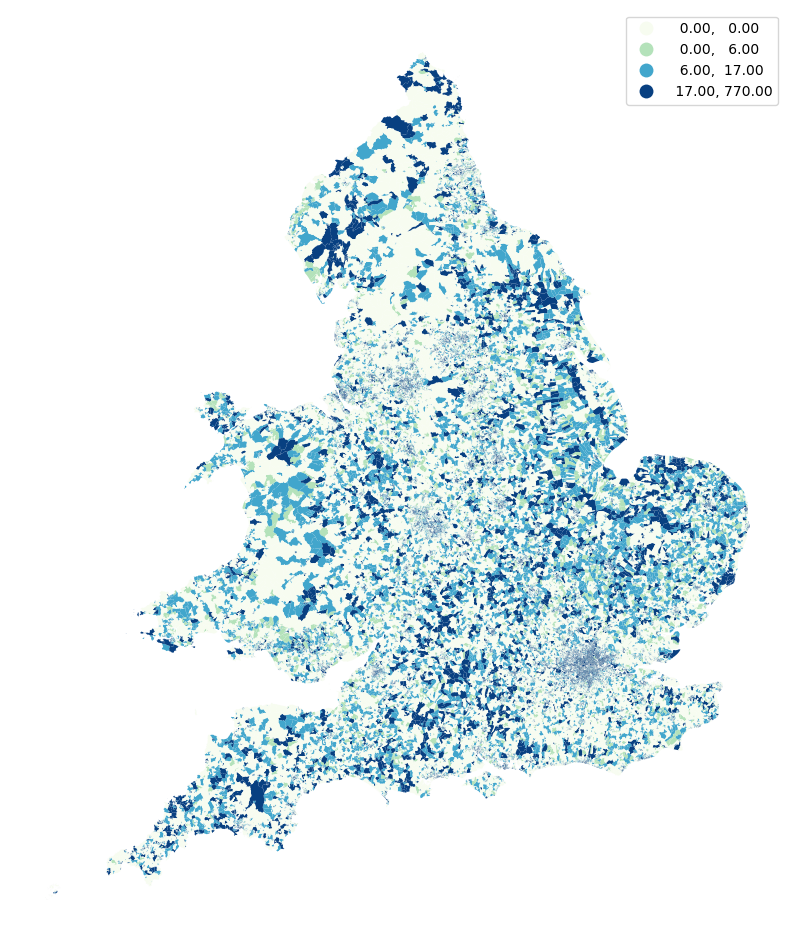

In [274]:
count_data3 = count_data3.fillna(0).drop(columns = ['index']).rename(columns={'Rented (private)':'Private','Rented (social)':'Social','Owner-occupied':'Owned'})
ax = count_data3.plot(column ='Private', legend = True, 
                                            cmap='GnBu',
                                            scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()

/opt/anaconda3/envs/env04/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


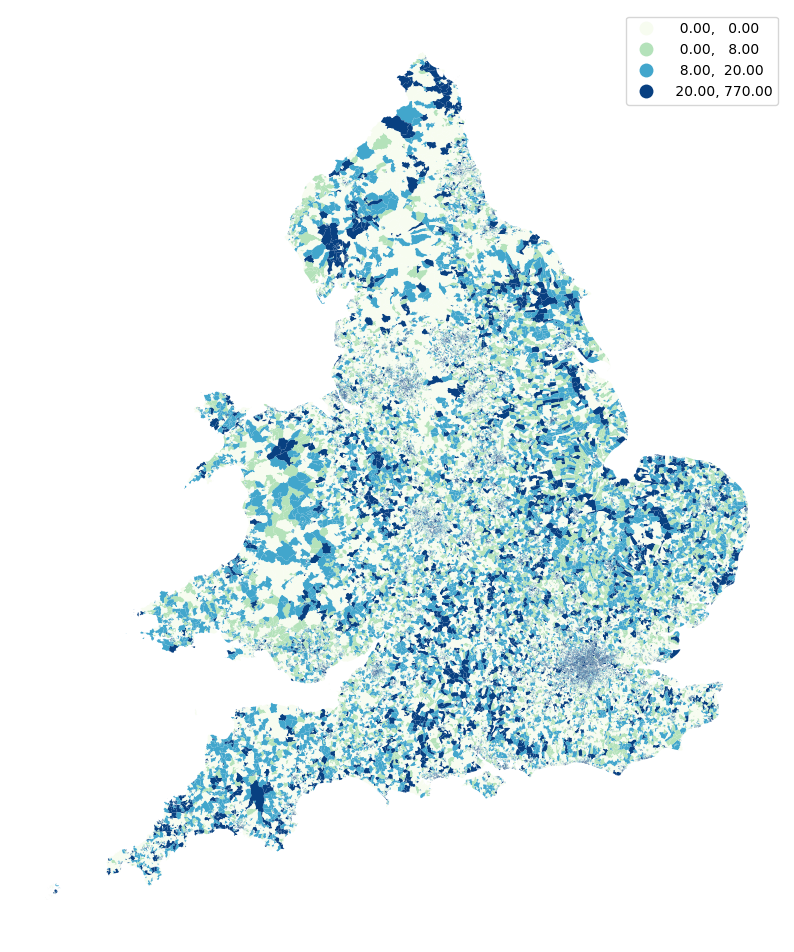

In [219]:
ax = count_data.plot(column ='Private', legend = True, 
                                            cmap='GnBu',
                                            scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()

/opt/anaconda3/envs/env04/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


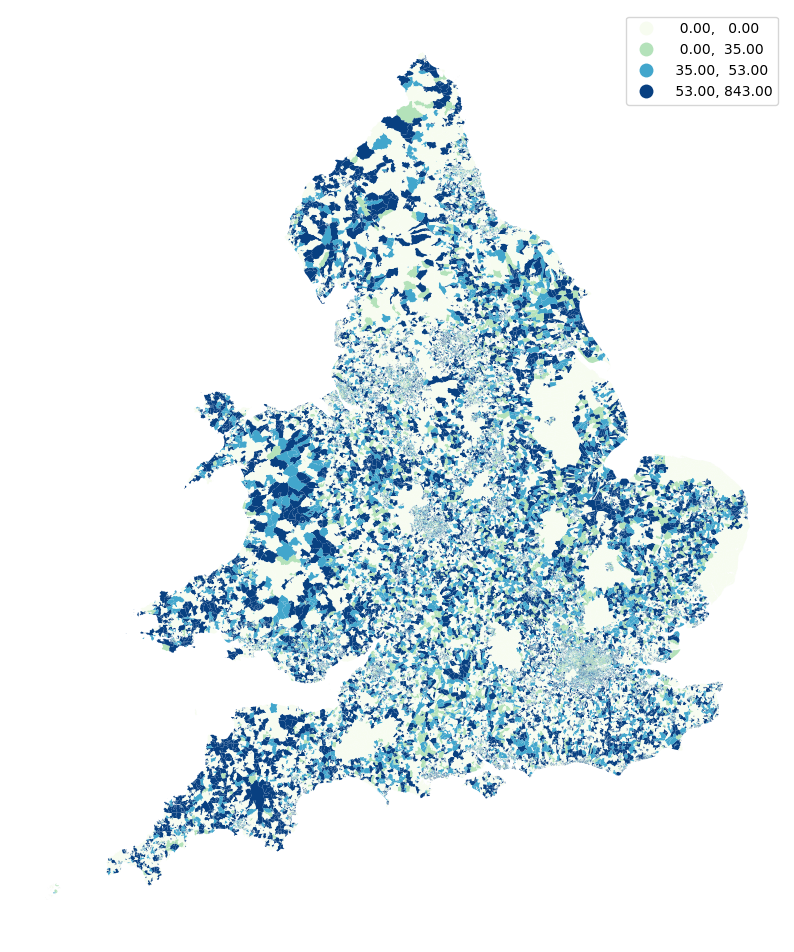

In [130]:
ax = count_data.plot(column ='Owned', legend = True, 
                                            cmap='GnBu',
                                            scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()

/opt/anaconda3/envs/env04/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


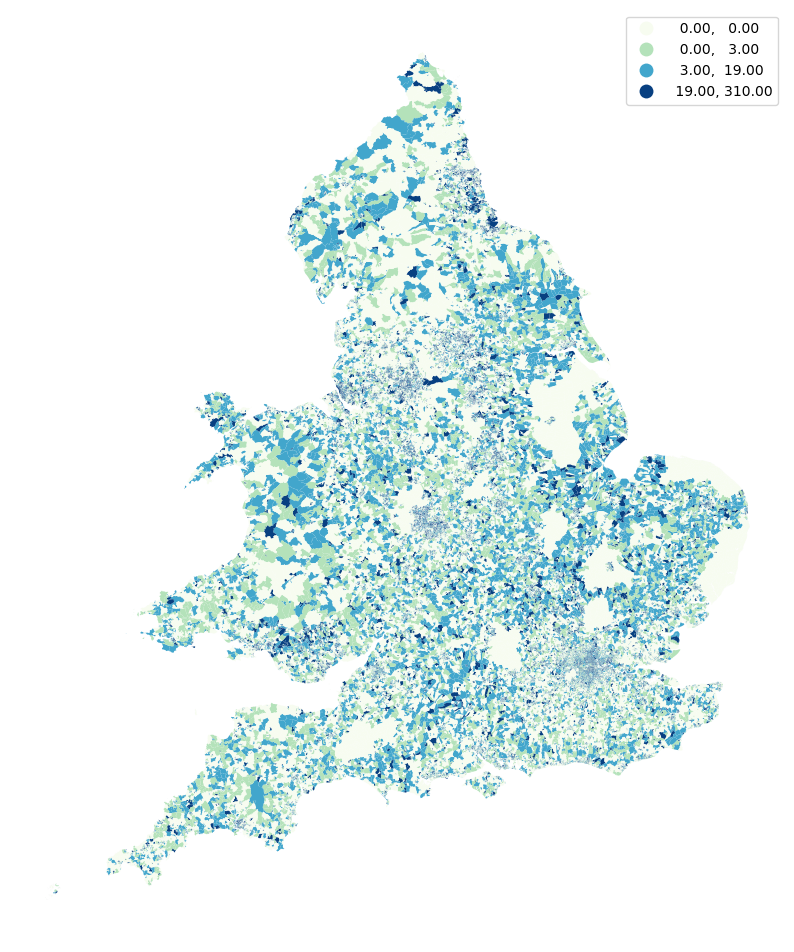

In [131]:
ax = count_data.plot(column ='Social', legend = True, 
                                            cmap='GnBu',
                                            scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()

/opt/anaconda3/envs/env04/lib/python3.11/site-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


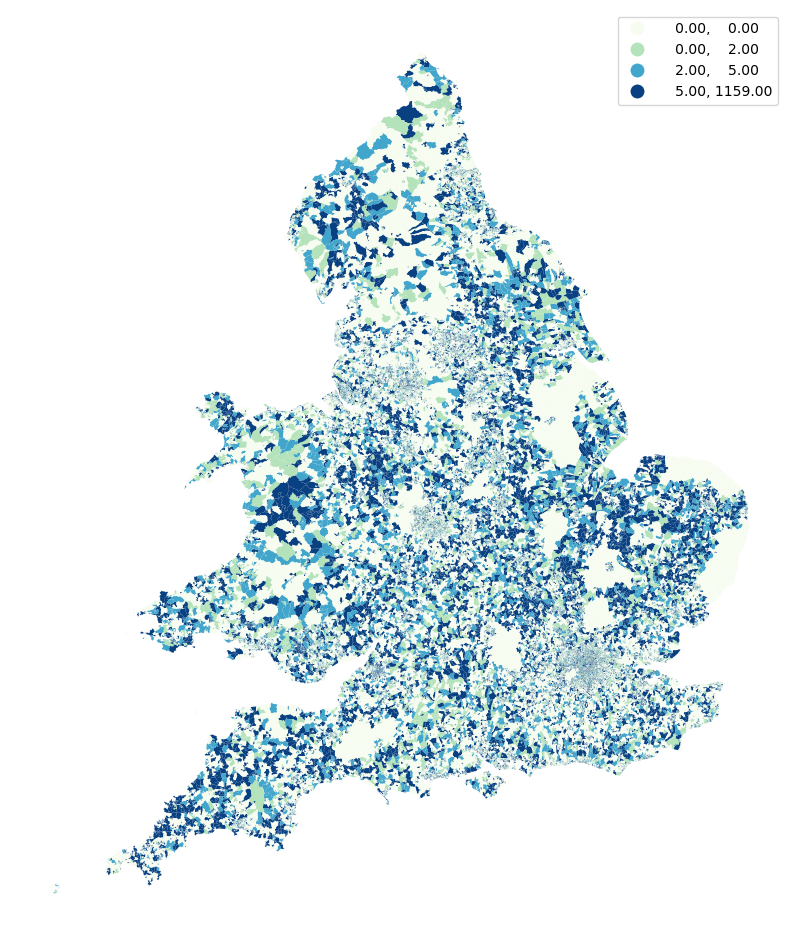

In [132]:
ax = count_data.plot(column ='Unknown', legend = True, 
                                            cmap='GnBu',
                                            scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()

# test how many EPC exists in each OA to remove the ones with little data

In [220]:
count_data['Total_known'] = count_data['Private'] + count_data['Owned'] + count_data['Social']
count_data

OA21CD                                           geometry  Social  \
0       E00000001  POLYGON ((-0.09448 51.51976, -0.09576 51.52007...     0.0   
1       E00000003  POLYGON ((-0.09576 51.52007, -0.09611 51.51963...     1.0   
2       E00000005  POLYGON ((-0.09627 51.51933, -0.09573 51.51879...     5.0   
3       E00000007  POLYGON ((-0.09601 51.51847, -0.09506 51.51824...     0.0   
4       E00000010  POLYGON ((-0.09689 51.52267, -0.09747 51.52217...     0.0   
...           ...                                                ...     ...   
188875  W00010693  POLYGON ((-4.12848 53.22421, -4.12716 53.22380...     0.0   
188876  W00010694  POLYGON ((-4.32088 51.86302, -4.32025 51.86247...     1.0   
188877  W00010695  POLYGON ((-4.07792 51.80287, -4.07763 51.80209...     0.0   
188878  W00010696  POLYGON ((-4.13322 51.66546, -4.13427 51.66550...     0.0   
188879  W00010697  POLYGON ((-4.17218 51.68614, -4.17242 51.68525...     0.0   

        Owned  Private  Unknown  Total_known  
0         0.0      0.0      0.0          0.0  
1        25.0      7.0      1.0         33.0  
2        56.0     44.0      1.0        105.0  
3         0.0      0.0      0.0          0.0  
4         0.0      0.0      0.0          0.0  
...       ...      ...      ...          ...  
188875    0.0      0.0      0.0          0.0  
188876   69.0     15.0     29.0         85.0  
188877    0.0      0.0      0.0          0.0  
188878    0.0      0.0      0.0          0.0  
188879    0.0      0.0      0.0          0.0  

[188880 rows x 7 columns]

In [221]:
count_data2 = count_data.copy()
count_data2['elimination_rule']  = np.where(count_data2['Total_known'] < 5, 'less than 5','more than 5')
count_data2
areas_with_less5 = count_data2[count_data2['elimination_rule'] == 'less than 5']['OA21CD'].unique()
areas_with_more5 = count_data2[count_data2['elimination_rule'] == 'more than 5']['OA21CD'].unique()
areas_with_less5

array(['E00000001', 'E00000007', 'E00000010', ..., 'W00010695',
       'W00010696', 'W00010697'], dtype=object)

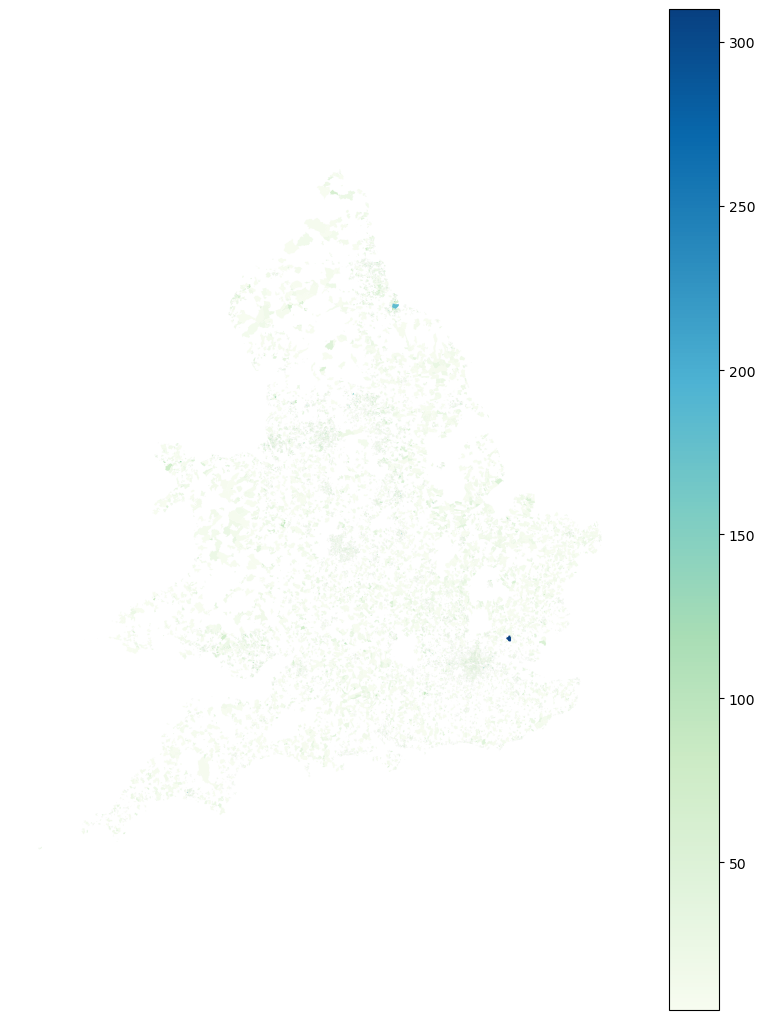

In [134]:
ax = count_data2.plot(column ='Social', legend = True, 
                                            cmap='GnBu',
                                            #scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()

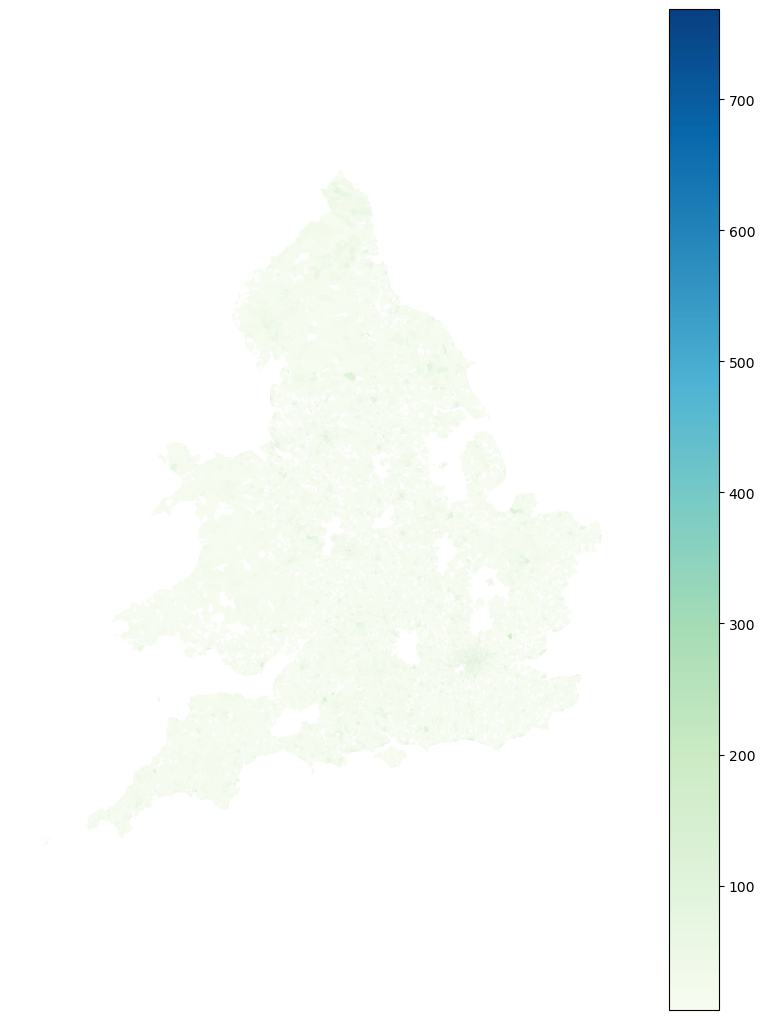

In [34]:
ax = count_data2.plot(column ='Private', legend = True, 
                                            cmap='GnBu',
                                            #scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()

In [276]:
pd.DataFrame(count_data3).to_csv('./../Data/count_data_tenure.csv')

In [251]:
count_data2['occurs_together'] = np.where(((count_data2['Private']>=3) | (count_data2['Social']>=3) | (count_data2['Owned']>=3)), 1, 0)
count_data2

OA21CD                                           geometry  Social  \
0       E00000001  POLYGON ((-0.09448 51.51976, -0.09576 51.52007...     0.0   
1       E00000003  POLYGON ((-0.09576 51.52007, -0.09611 51.51963...     1.0   
2       E00000005  POLYGON ((-0.09627 51.51933, -0.09573 51.51879...     5.0   
3       E00000007  POLYGON ((-0.09601 51.51847, -0.09506 51.51824...     0.0   
4       E00000010  POLYGON ((-0.09689 51.52267, -0.09747 51.52217...     0.0   
...           ...                                                ...     ...   
188875  W00010693  POLYGON ((-4.12848 53.22421, -4.12716 53.22380...     0.0   
188876  W00010694  POLYGON ((-4.32088 51.86302, -4.32025 51.86247...     1.0   
188877  W00010695  POLYGON ((-4.07792 51.80287, -4.07763 51.80209...     0.0   
188878  W00010696  POLYGON ((-4.13322 51.66546, -4.13427 51.66550...     0.0   
188879  W00010697  POLYGON ((-4.17218 51.68614, -4.17242 51.68525...     0.0   

        Owned  Private  Unknown  Total_known elimination_rule  occurs_together  
0         0.0      0.0      0.0          0.0      less than 5                0  
1        25.0      7.0      1.0         33.0      more than 5                1  
2        56.0     44.0      1.0        105.0      more than 5                1  
3         0.0      0.0      0.0          0.0      less than 5                0  
4         0.0      0.0      0.0          0.0      less than 5                0  
...       ...      ...      ...          ...              ...              ...  
188875    0.0      0.0      0.0          0.0      less than 5                0  
188876   69.0     15.0     29.0         85.0      more than 5                1  
188877    0.0      0.0      0.0          0.0      less than 5                0  
188878    0.0      0.0      0.0          0.0      less than 5                0  
188879    0.0      0.0      0.0          0.0      less than 5                0  

[188880 rows x 9 columns]

In [239]:
count_data2['occurs_together'] = np.where(((count_data2['Total_known']>=5)), 1, 0)

In [252]:
list_3_one = count_data2[count_data2['occurs_together']>0]['OA21CD'].unique()
list_3_one

array(['E00000003', 'E00000005', 'E00000013', ..., 'W00010691',
       'W00010692', 'W00010694'], dtype=object)

In [240]:
list_5_total = count_data2[count_data2['occurs_together']>0]['OA21CD'].unique()
list_5_total 

array(['E00000003', 'E00000005', 'E00000013', ..., 'W00010691',
       'W00010692', 'W00010694'], dtype=object)

In [236]:
list_3_each = count_data2[count_data2['occurs_together']>0]['OA21CD'].unique()
list_3_each 

array(['E00000005', 'E00000021', 'E00000023', ..., 'W00010687',
       'W00010689', 'W00010691'], dtype=object)

In [232]:
list_5_each = count_data2[count_data2['occurs_together']>0]['OA21CD'].unique()
list_5_each 

array(['E00000005', 'E00000025', 'E00000028', ..., 'W00010685',
       'W00010687', 'W00010691'], dtype=object)

In [254]:
A = len(OA21['OA21CD'].unique())
B = len(list_5_total)
C= len(list_3_each)
D = len(list_5_each)
E = len(list_3_one)

print('From ' + str(A) + ' EPCs in total, the limit of 5 EPCs in one OA leaves ' + str(round( (B/A)*100,0)) +'%%')
print('From ' + str(A) + ' EPCs in total, the limit of 3 EPCs in each Tenure in one OA leaves ' + str(round( (C/A)*100,0)) +'%%')
print('From ' + str(A) + ' EPCs in total, the limit of 5 EPCs in each Tenure in one OA leaves ' + str(round( (D/A)*100,0)) +'%%')
print('From ' + str(A) + ' EPCs in total, the limit of 3 EPCs in each Tenure in one OA, but delete only that tenure that has less than 3, I will have ' + str(round( (E/A)*100,0)) +'%%')


From 188880 EPCs in total, the limit of 5 EPCs in one OA leaves 57.0%%
From 188880 EPCs in total, the limit of 3 EPCs in each Tenure in one OA leaves 42.0%%
From 188880 EPCs in total, the limit of 5 EPCs in each Tenure in one OA leaves 33.0%%
From 188880 EPCs in total, the limit of 3 EPCs in each Tenure in one OA, but delete only that tenure that has less than 3, I will have 57.0%%


In [285]:
mean_data = pd.DataFrame(columns=['OA21CD'],data = cleaned_epc['OA21CD'].unique())

for i in cleaned_epc.TENURE.unique():
    d = cleaned_epc.loc[cleaned_epc.TENURE.isin([i]),['OA21CD','TOTAL_FLOOR_AREA']].groupby('OA21CD').mean().rename(columns={'TOTAL_FLOOR_AREA':i})
    mean_data = mean_data.merge(d, on = 'OA21CD',how = 'left')

mean_data = OA21.loc[:,['OA21CD','geometry']].reset_index().merge(mean_data, how = 'right', on = 'OA21CD')

In [286]:
median_data = pd.DataFrame(columns=['OA21CD'],data = cleaned_epc['OA21CD'].unique())

for i in cleaned_epc.TENURE.unique():
    d = cleaned_epc.loc[cleaned_epc.TENURE.isin([i]),['OA21CD','TOTAL_FLOOR_AREA']].groupby('OA21CD').median().rename(columns={'TOTAL_FLOOR_AREA':i})
    median_data = median_data.merge(d, on = 'OA21CD', how = 'left')

median_data = OA21.loc[:,['OA21CD','geometry']].reset_index().merge(median_data, how = 'right', on = 'OA21CD')

In [288]:
median_data

index     OA21CD                                           geometry  \
0       170454  E00182441  POLYGON ((0.09507 51.78375, 0.09580 51.78339, ...   
1       105163  E00111052  POLYGON ((0.10015 51.74750, 0.09988 51.74681, ...   
2       170502  E00182489  POLYGON ((0.13245 51.79585, 0.13295 51.79194, ...   
3       105024  E00110905  POLYGON ((0.08694 51.75779, 0.08632 51.75767, ...   
4       105150  E00111039  POLYGON ((0.10445 51.75208, 0.10348 51.75197, ...   
...        ...        ...                                                ...   
107443   37598  E00039963  POLYGON ((-1.48183 53.46629, -1.48167 53.46572...   
107444   38051  E00040425  POLYGON ((-1.45157 53.35768, -1.45046 53.35751...   
107445   37389  E00039730  POLYGON ((-1.41097 53.35057, -1.41042 53.34975...   
107446  117547  E00124083  POLYGON ((0.30789 51.38680, 0.30768 51.38815, ...   
107447  101801  E00107525  POLYGON ((0.21128 50.76473, 0.21071 50.76411, ...   

        Rented (private)  Rented (social)  Owner-occupied  
0                  58.00            57.00           57.85  
1                  55.95            68.50           72.50  
2                  53.00            45.60           55.50  
3                  72.42            74.00           76.50  
4                  53.50            51.35           60.00  
...                  ...              ...             ...  
107443               NaN              NaN           72.00  
107444               NaN              NaN           81.00  
107445               NaN              NaN           77.00  
107446               NaN              NaN           95.00  
107447               NaN              NaN          119.24  

[107448 rows x 6 columns]

In [289]:
median_data.to_file('./../Data/Energy_Performance_Certificate/OA_median_floor_area_by_tenure.geojson')

KeyError: 'Rented'

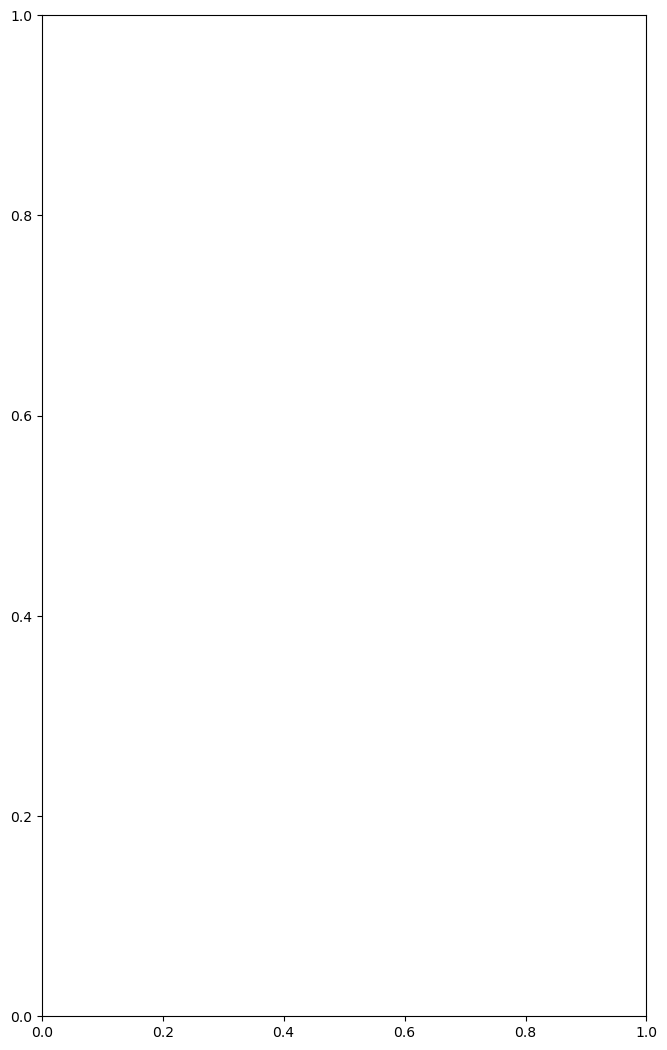

In [284]:
ax = median_data.plot(column ='Rented', legend = True, 
                                            cmap='RdBu',
                                            #scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()

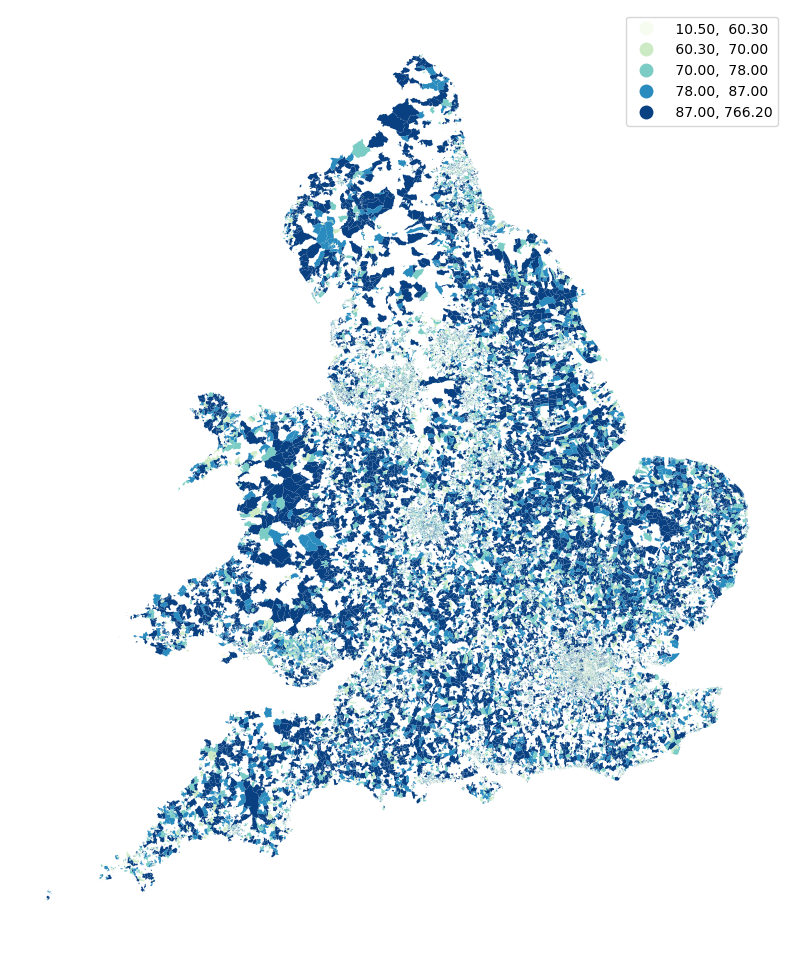

In [290]:
ax = median_data.plot(column ='Rented (private)', legend = True, 
                                            cmap='GnBu',
                                            scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()

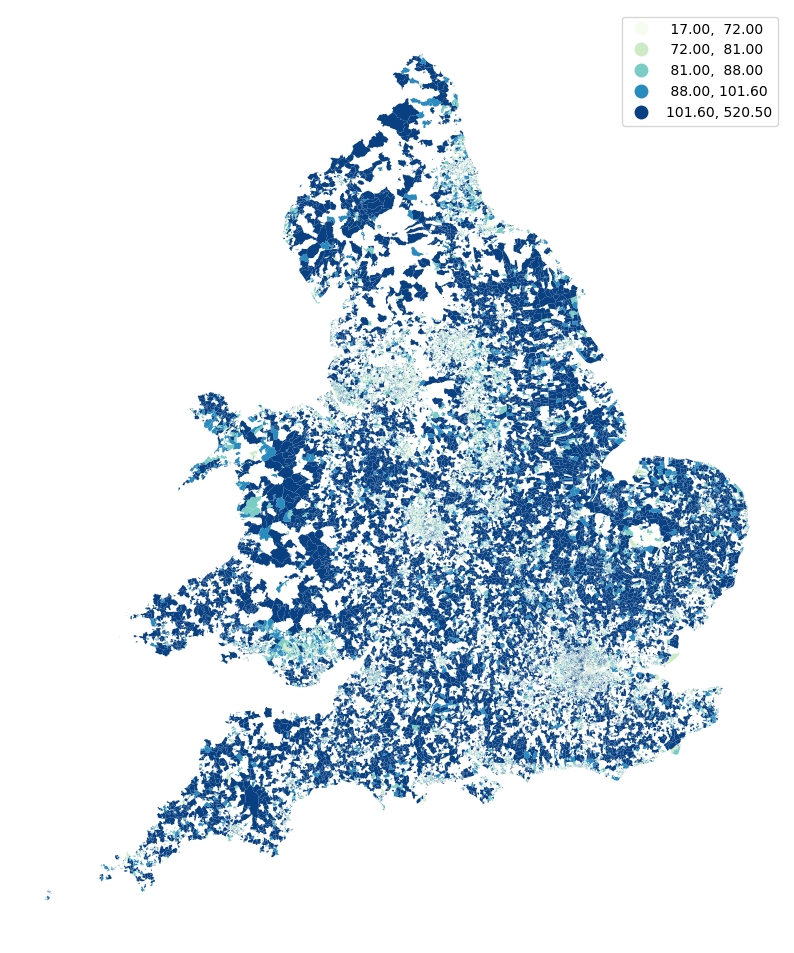

In [283]:
ax = median_data.plot(column ='Owner-occupied', legend = True, 
                                            cmap='GnBu',
                                            scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()

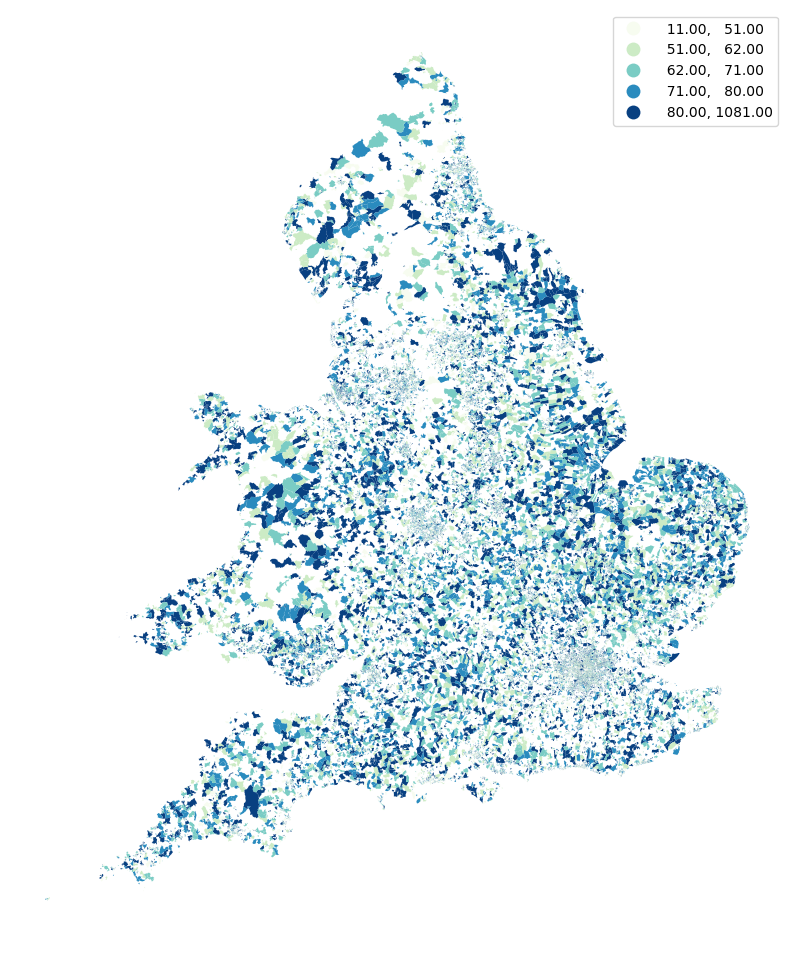

In [282]:

ax = median_data.plot(column ='Rented (social)', legend = True, 
                                            cmap='GnBu',
                                            scheme="quantiles", k=5,
                                            figsize=(10, 13))
ax.set_axis_off()